# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing
Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk




- Task 1: Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

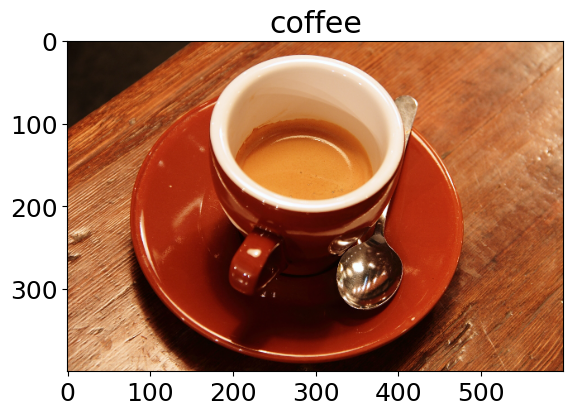

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

matplotlib.rcParams['font.size'] = 18

caller = getattr(data, 'coffee')
image = caller()
plt.figure()
plt.title('coffee')
plt.imshow(image)

- Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions.

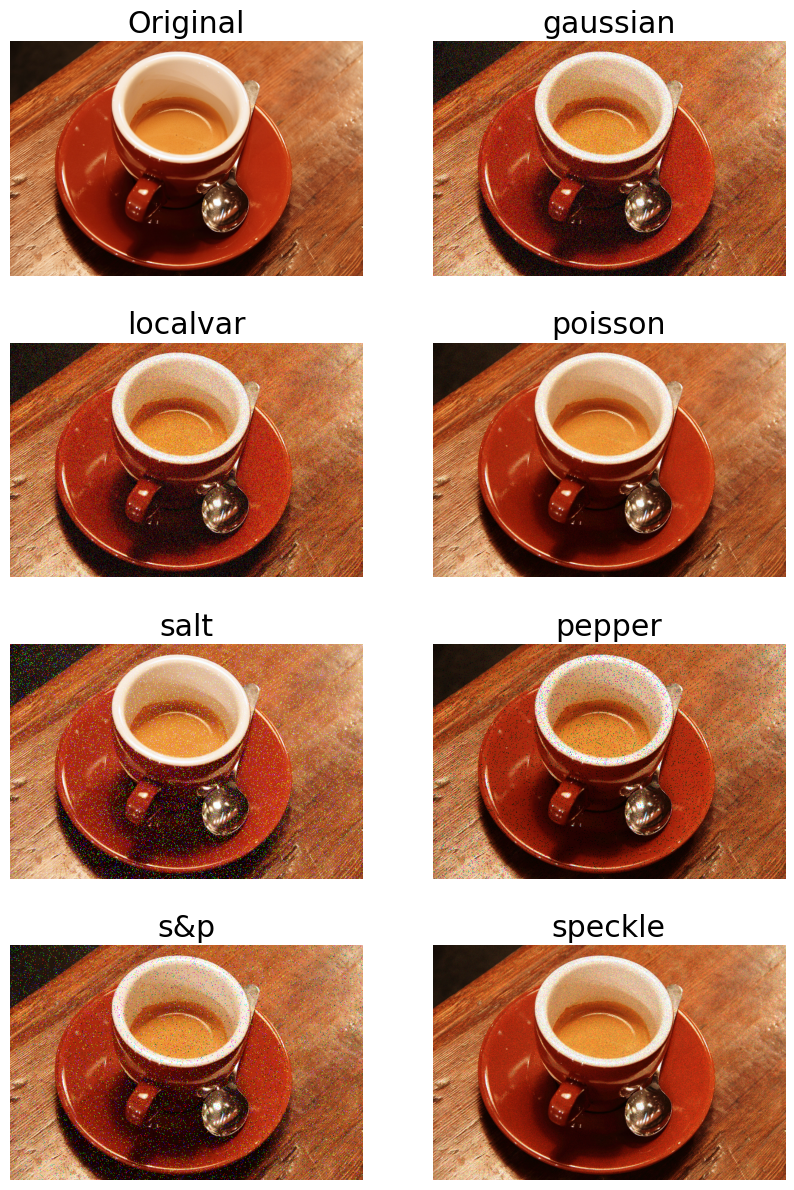

In [17]:
from skimage import util

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.ravel()

axes[0].set_title('Original')
axes[0].imshow(image)
axes[0].axis('off')

filters = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']
for f in filters:
    ax = axes[filters.index(f) + 1]
    ax.set_title(f)
    filtered_image = util.random_noise(image, mode=f)
    ax.imshow(filtered_image)
    ax.axis('off')

- Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

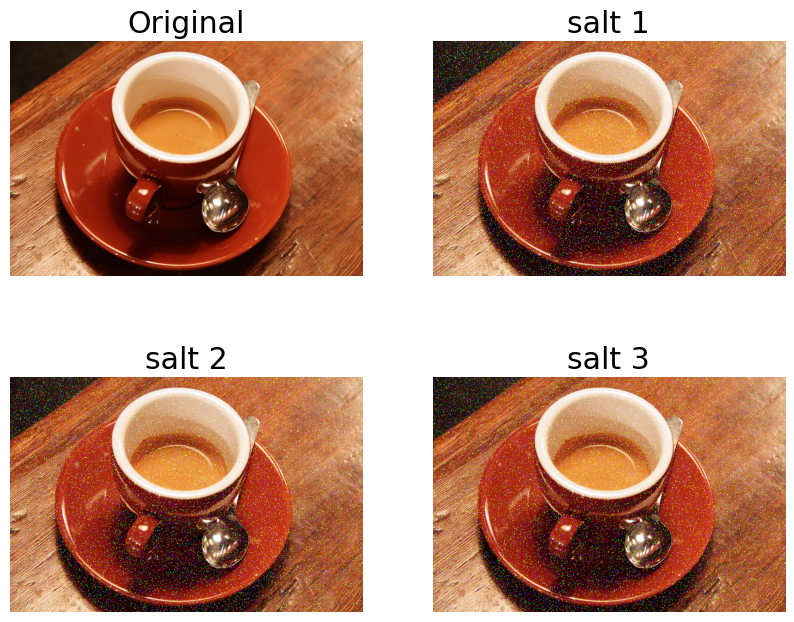

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

axes[0].set_title('Original')
axes[0].imshow(image)
axes[0].axis('off')

noisy_images = []

for i in range(1,4):
    ax = axes[i]
    ax.set_title('salt ' + str(i))
    filtered_image = util.random_noise(image, mode='salt')
    noisy_images.append(filtered_image)
    ax.imshow(filtered_image)
    ax.axis('off')

- Task 4: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the three noisy images generated in the previus task. Represent and comment the results.

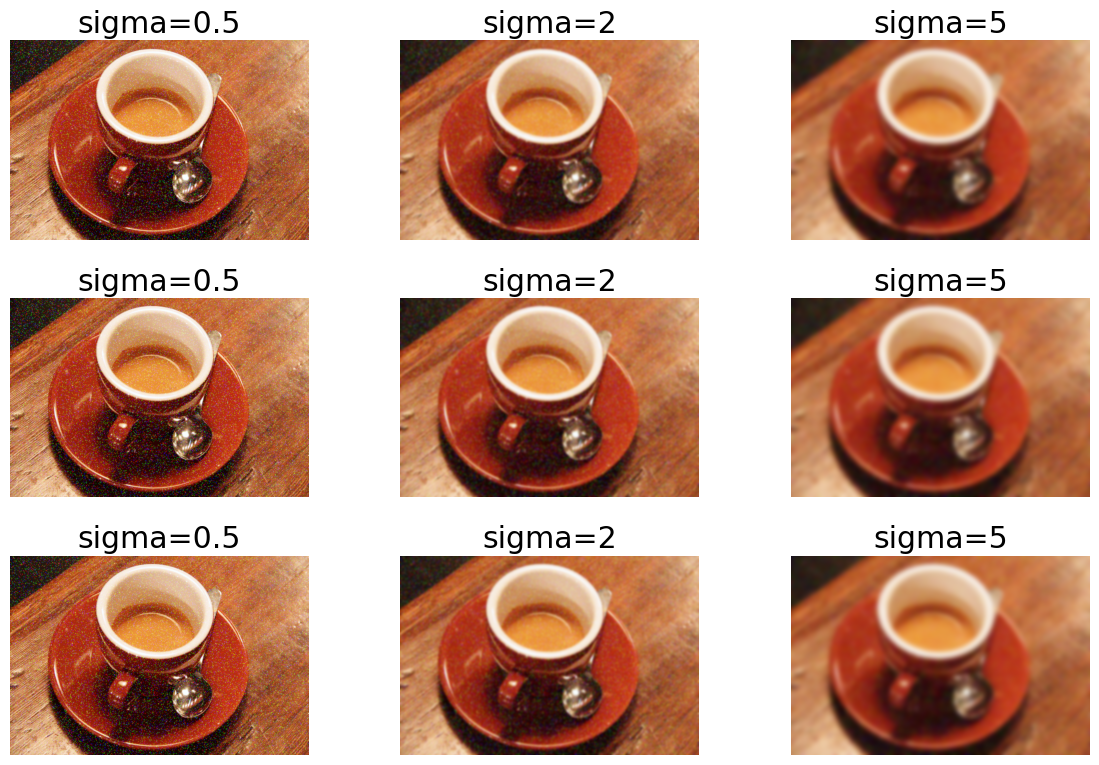

In [ ]:
from skimage.filters import gaussian
import matplotlib.pyplot as plt

sigmas = [0.5, 2, 5]
fig, axes = plt.subplots(len(noisy_images), len(sigmas), figsize=(12, 8))

for i, noisy_img in enumerate(noisy_images):
    for j, sigma in enumerate(sigmas):
        filtered = gaussian(noisy_img, sigma=sigma, channel_axis=-1)
        axes[i, j].imshow(filtered)
        axes[i, j].set_title(f'sigma={sigma}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


Increasing the sigma parameter in the Gaussian filter increases the amount of blurring:

- Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

Fraction of image corresponding to edges: 0.287
Fraction of image corresponding to bricks (non-edges): 0.713


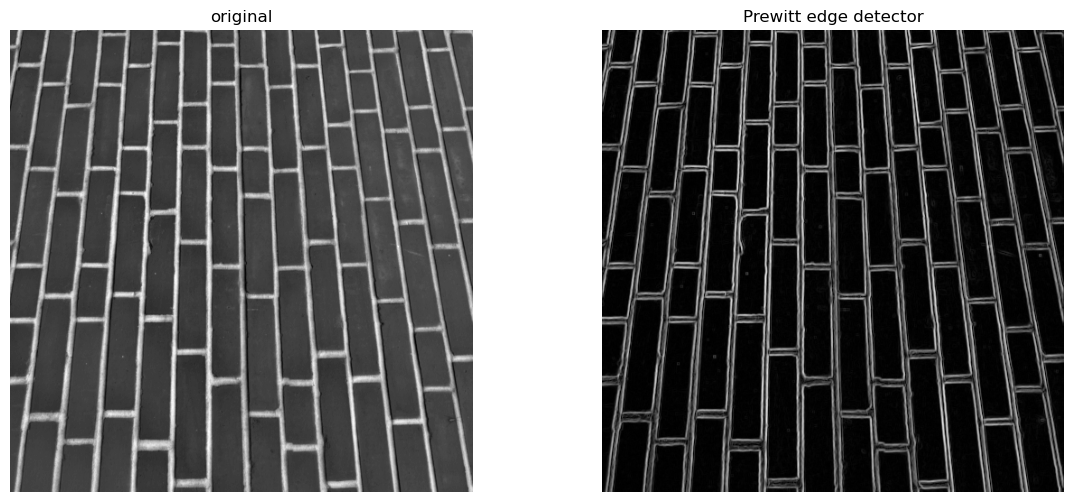

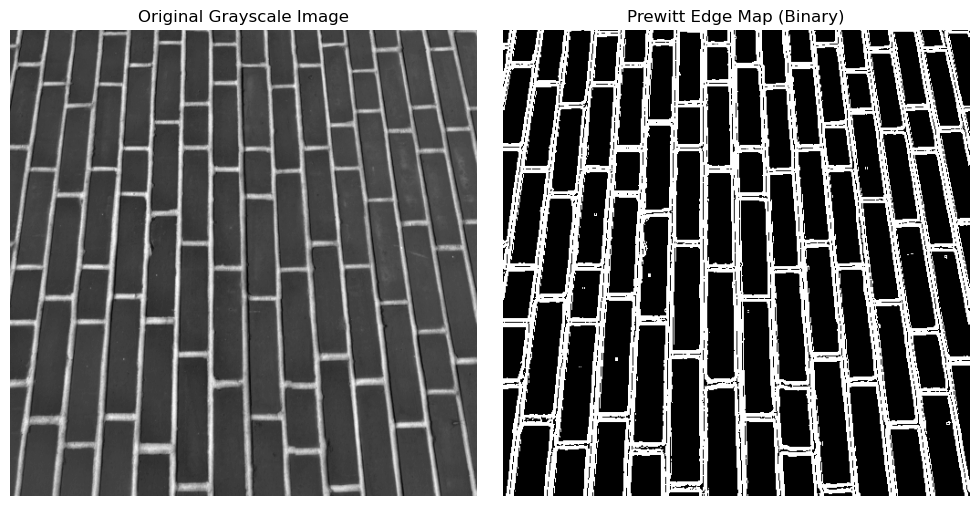

In [ ]:
from skimage.data import brick, coffee
from skimage.filters import prewitt

import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

bricks = brick()
edges = prewitt(bricks)
plot_comparison(bricks, edges, 'Prewitt edge detector') # The images will be gray


# Choose a threshold (e.g., mean value)
threshold = edges.mean()
edges_binary = edges > threshold

# Compute fractions
total_pixels = edges_binary.size
edge_pixels = np.sum(edges_binary)
edge_fraction = edge_pixels / total_pixels
brick_fraction = 1 - edge_fraction

print(f"Fraction of image corresponding to edges: {edge_fraction:.3f}")
print(f"Fraction of image corresponding to bricks (non-edges): {brick_fraction:.3f}")


- Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondence between spatial patterns in the original image and high/low frequency components of its Fourier transform.

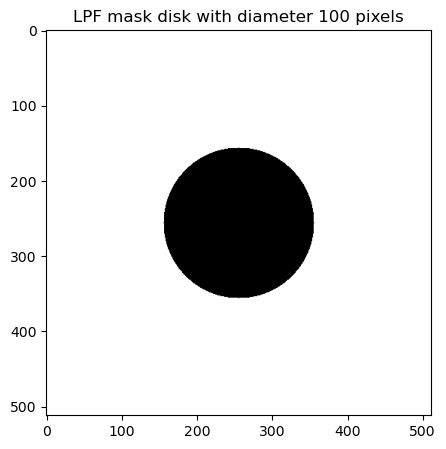

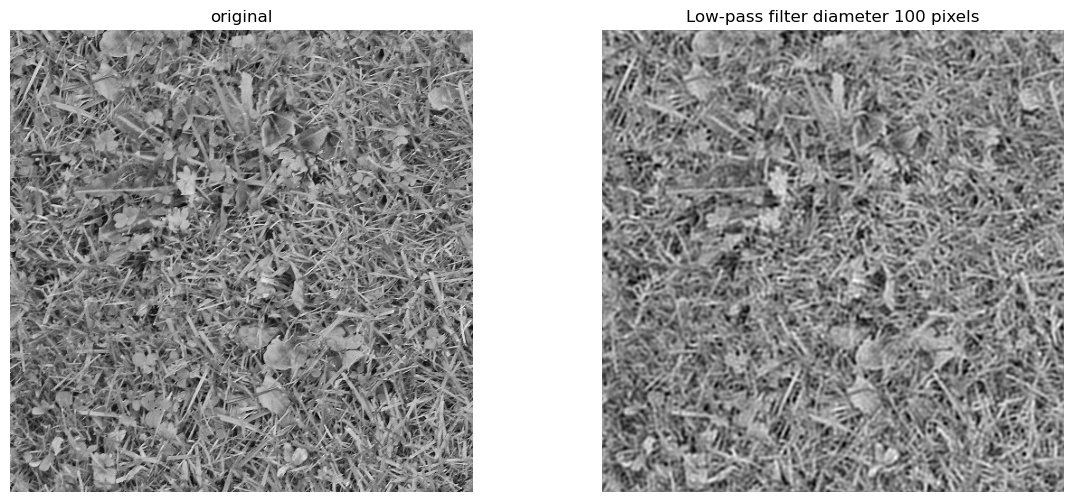

In [24]:
from skimage import data, color
import matplotlib.pyplot as plt

# Load the grass image (already grayscale)
img = data.grass()

nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

The low-pass filtered image retains only the smooth, slowly varying patterns—broad areas of similar intensity. Fine details and texture (such as the blades of grass) are blurred or removed. This demonstrates that low-frequency components correspond to the overall shapes and gradual intensity changes in the image

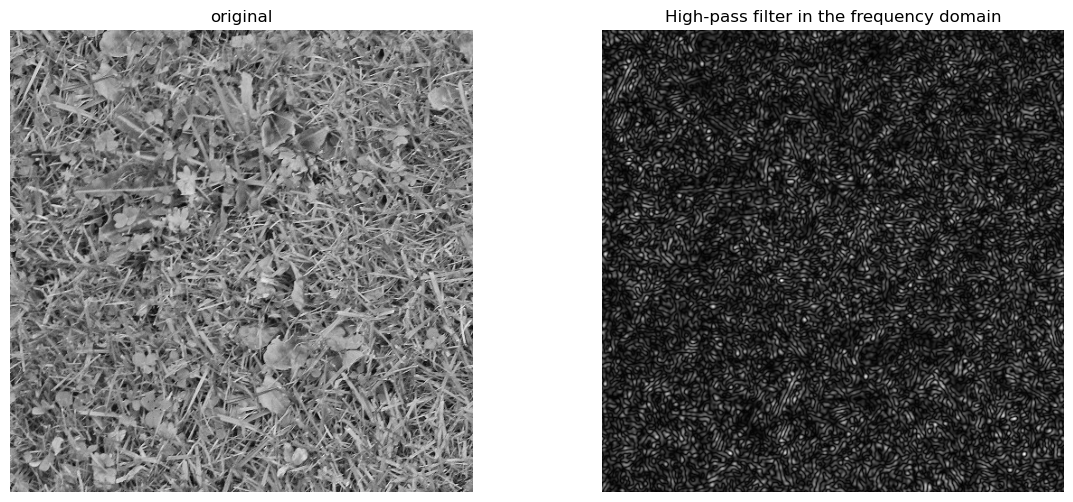

In [30]:
img = data.grass()
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

The high-pass filtered image highlights fine details, edges, and texture—such as the individual blades and the granular structure of the grass. The overall brightness and smooth regions are suppressed. This shows that high-frequency components correspond to rapid intensity changes and fine spatial patterns.

- Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

Number of iterations until all blobs are eroded: 22


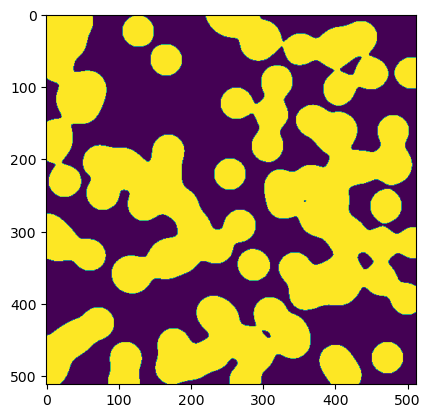

In [45]:
from skimage.morphology import disk, erosion

blobs = data.binary_blobs()
plt.imshow(blobs)

element = disk(3)
blobs_eroded = blobs.copy()
count = 0

while np.any(blobs_eroded):
    blobs_eroded = erosion(blobs_eroded, element)
    count += 1

print(f"Number of iterations until all blobs are eroded: {count}")